In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Time vs. N

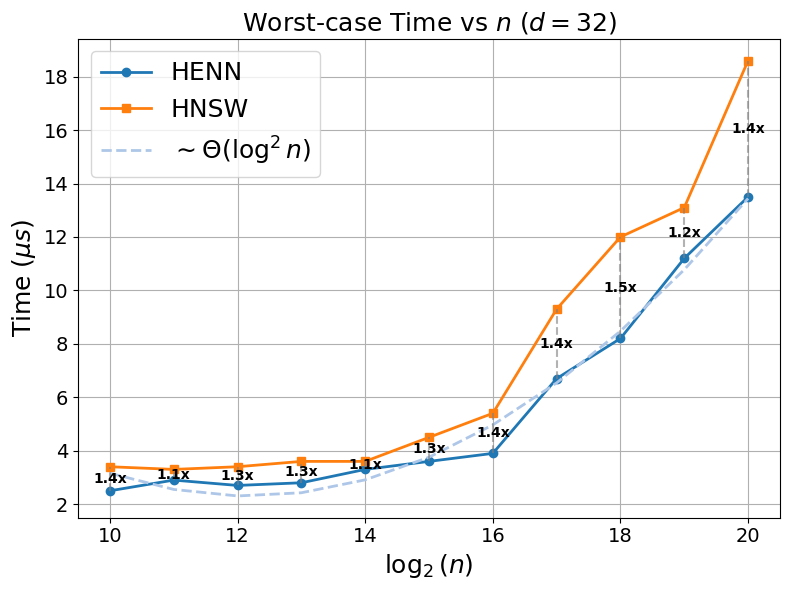

In [ ]:
dim = 32

df = pd.read_csv(f"../../reports/time_vs_n_dim={dim}.csv")
df["HENN"] = df["HENN"] * 1000000
df["HNSW"] = df["HNSW"] * 1000000

plt.figure(figsize=(8, 6))

# Plot original data points with strong, distinct colors
plt.plot(
    df["logn"], df["HENN"], label=r"HENN", marker="o", color="#1f77b4", linewidth=2
)  # blue
plt.plot(
    df["logn"], df["HNSW"], label=r"HNSW", marker="s", color="#ff7f0e", linewidth=2
)  # orange

# Fit and plot HENN trend (log^2 n), lighter version of blue
log_coeffs = np.polyfit(df["logn"], df["HENN"], 2)
henn_trend = np.polyval(log_coeffs, df["logn"])
plt.plot(
    df["logn"],
    henn_trend,
    label=r"$\sim \Theta(\log^2 n)$",
    linestyle="--",
    color="#aec7e8",
    linewidth=2,
)

# Fit and plot HNSW trend (linear in n), lighter version of orange
# hnsw_coeffs = np.polyfit(2 ** df["logn"], df["HNSW"], 1)  # fitting on n = 2^logn
# n_vals = 2 ** df["logn"]
# hnsw_trend = np.polyval(hnsw_coeffs, n_vals)
# plt.plot(
#     df["logn"],
#     hnsw_trend,
#     label=r"$\sim \Theta(n)$",
#     linestyle="--",
#     color="#ffbb78",
#     linewidth=2,
# )

# Vertical lines + annotations for speedup
for x_val, henn, hnsw in zip(df["logn"], df["HENN"], df["HNSW"]):
    plt.vlines(
        x=x_val,
        ymin=min(henn, hnsw),
        ymax=max(henn, hnsw),
        color="grey",
        linestyle="--",
        alpha=0.6,
    )
    speedup = hnsw / henn if henn != 0 else float("inf")
    midpoint = (henn + hnsw) / 2
    plt.text(
        x_val,
        midpoint,
        f"{speedup:.1f}x",
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        weight="bold",
    )

# Labels and aesthetics
plt.xlabel("$\\log_2(n)$", fontsize=18)
plt.ylabel("Time ($\\mu s$)", fontsize=18)
plt.title(f"Worst-case Time vs $n$ ($d = {dim}$)", fontsize=18)
plt.tick_params(axis="x", labelsize=14)  # Increase font size for x-axis numbers
plt.tick_params(axis="y", labelsize=14)  # Increase font size for y-axis numbers
plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"time_vs_n_dim={dim}.png", bbox_inches="tight", dpi=300)
plt.show()

### Hops vs N

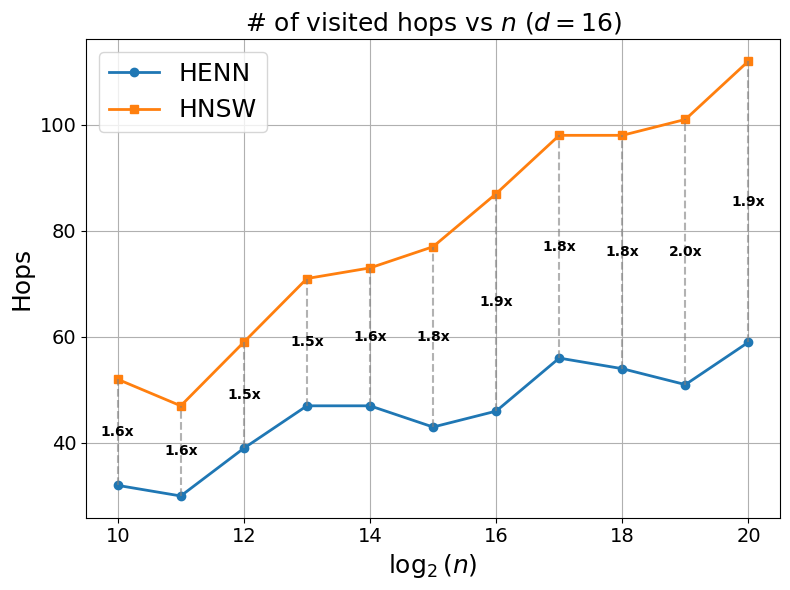

In [ ]:
dim = 16

df = pd.read_csv(f"../../reports/hops_vs_n_dim={dim}.csv")

plt.figure(figsize=(8, 6))

# Plot original data points with strong, distinct colors
plt.plot(
    df["logn"], df["HENN_hop"], label=r"HENN", marker="o", color="#1f77b4", linewidth=2
)  # blue
plt.plot(
    df["logn"], df["HNSW_hop"], label=r"HNSW", marker="s", color="#ff7f0e", linewidth=2
)  # orange

# Vertical lines + annotations for speedup
for x_val, henn, hnsw in zip(df["logn"], df["HENN_hop"], df["HNSW_hop"]):
    plt.vlines(
        x=x_val,
        ymin=min(henn, hnsw),
        ymax=max(henn, hnsw),
        color="grey",
        linestyle="--",
        alpha=0.6,
    )
    speedup = hnsw / henn if henn != 0 else float("inf")
    midpoint = (henn + hnsw) / 2
    plt.text(
        x_val,
        midpoint,
        f"{speedup:.1f}x",
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        weight="bold",
    )

# Labels and aesthetics
plt.xlabel("$\\log_2(n)$", fontsize=18)
plt.ylabel("Hops", fontsize=18)
plt.title(f"# of visited hops vs $n$ ($d = {dim}$)", fontsize=18)
plt.tick_params(axis="x", labelsize=14)  # Increase font size for x-axis numbers
plt.tick_params(axis="y", labelsize=14)  # Increase font size for y-axis numbers
plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"hops_vs_n_dim={dim}.png", bbox_inches="tight", dpi=300)
plt.show()

### Time vs Dim

In [35]:
df = pd.read_csv("../../reports/time_vs_dim_n=16.csv")
# df["HENN"] = df["HENN"] * 1000000
# df["HNSW"] = df["HNSW"] * 1000000
df.head()

,logn,dim,HENN,HNSW
0,16,4,2.4,3.0
1,16,8,2.5,3.8
2,16,16,3.1,3.8
3,16,32,3.4,4.3
4,16,64,3.5,5.6


In [39]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    residuals = actual - predicted
    mse = np.mean(residuals**2)
    return np.sqrt(mse)

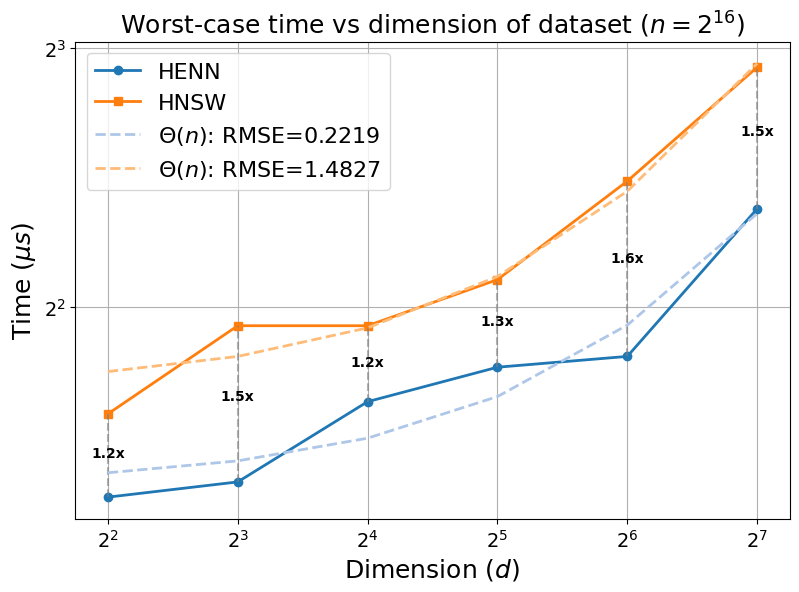

In [38]:
plt.figure(figsize=(8, 6))

# Plot HENN and HNSW against dim
plt.plot(
    df["dim"], df["HENN"], label="HENN", marker="o", color="#1f77b4", linewidth=2
)  # blue
plt.plot(
    df["dim"], df["HNSW"], label="HNSW", marker="s", color="#ff7f0e", linewidth=2
)  # orange

# Add vertical lines and speedup annotations
for dim, henn, hnsw in zip(df["dim"], df["HENN"], df["HNSW"]):
    plt.vlines(
        x=dim,
        ymin=min(henn, hnsw),
        ymax=max(henn, hnsw),
        color="grey",
        linestyle="--",
        alpha=0.6,
    )
    speedup = hnsw / henn if henn != 0 else float("inf")
    midpoint = (henn + hnsw) / 2
    plt.text(
        dim,
        midpoint,
        f"{speedup:.1f}x",
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        weight="bold",
    )

# Fit and plot HENN trend (log^2 n), lighter version of blue
log_coeffs = np.polyfit(df["dim"], df["HENN"], 1)
henn_trend = np.polyval(log_coeffs, df["dim"])
henn_rmse = calculate_rmse(df["HENN"], henn_trend)
plt.plot(
    df["dim"],
    henn_trend,
    label=rf"$\Theta(n)$: RMSE={henn_rmse:.4f}",
    linestyle="--",
    color="#aec7e8",
    linewidth=2,
)

# Fit and plot HENN trend (log^2 n), lighter version of blue
log_coeffs = np.polyfit(df["dim"], df["HNSW"], 1)
henn_trend = np.polyval(log_coeffs, df["dim"])
henn_rmse = calculate_rmse(df["HENN"], henn_trend)
plt.plot(
    df["dim"],
    henn_trend,
    label=rf"$\Theta(n)$: RMSE={henn_rmse:.4f}",
    linestyle="--",
    color="#ffbb78",
    linewidth=2,
)

# Labels and aesthetics
plt.xlabel("Dimension ($d$)", fontsize=18)
plt.ylabel("Time ($\\mu s$)", fontsize=18)
plt.title("Worst-case time vs dimension of dataset ($n = 2^{16}$)", fontsize=18)
plt.tick_params(axis="x", labelsize=14)  # Increase font size for x-axis numbers
plt.tick_params(axis="y", labelsize=14)  # Increase font size for y-axis numbers
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.yscale("log", base=2)  # Set y-axis to log scale
# plt.savefig("time_vs_dim_n=16.png", bbox_inches="tight", dpi=300)
plt.show()

### Hops vs Dim

In [38]:
df = pd.read_csv("../../reports/hops_vs_dim_n=16.csv")
# df["HENN"] = df["HENN"] * 1000000
# df["HNSW"] = df["HNSW"] * 1000000
df.head()

,logn,dim,HENN_hop,HNSW_hop,HENN_dist,HNSW_dist
0,16,4,58,103,432,855
1,16,8,56,93,450,928
2,16,16,48,87,428,808
3,16,32,42,76,320,767
4,16,64,49,76,430,675


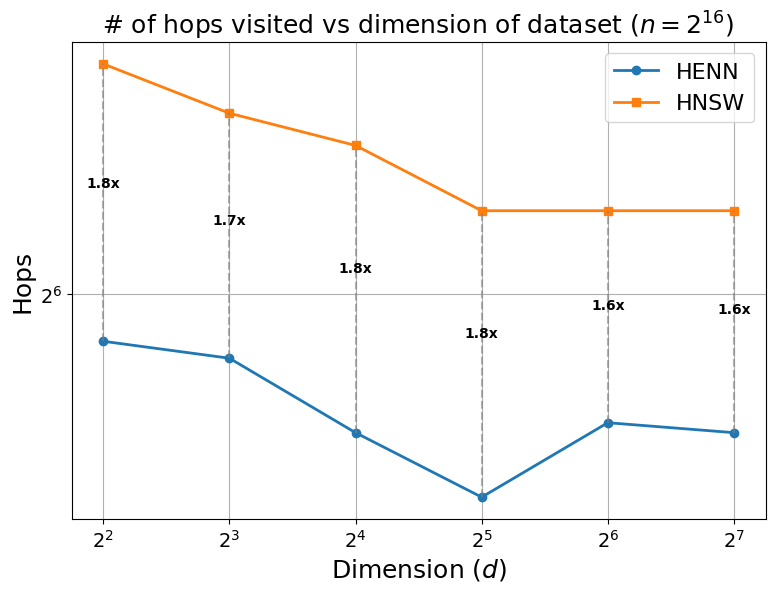

In [ ]:
plt.figure(figsize=(8, 6))

# Plot HENN and HNSW against dim
plt.plot(
    df["dim"], df["HENN_hop"], label="HENN", marker="o", color="#1f77b4", linewidth=2
)  # blue
plt.plot(
    df["dim"], df["HNSW_hop"], label="HNSW", marker="s", color="#ff7f0e", linewidth=2
)  # orange

# Add vertical lines and speedup annotations
for dim, henn, hnsw in zip(df["dim"], df["HENN_hop"], df["HNSW_hop"]):
    plt.vlines(
        x=dim,
        ymin=min(henn, hnsw),
        ymax=max(henn, hnsw),
        color="grey",
        linestyle="--",
        alpha=0.6,
    )
    speedup = hnsw / henn if henn != 0 else float("inf")
    midpoint = (henn + hnsw) / 2
    plt.text(
        dim,
        midpoint,
        f"{speedup:.1f}x",
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        weight="bold",
    )

# Labels and aesthetics
plt.xlabel("Dimension ($d$)", fontsize=18)
plt.ylabel("Hops", fontsize=18)
plt.title("# of hops visited vs dimension of dataset ($n = 2^{16}$)", fontsize=18)
plt.tick_params(axis="x", labelsize=14)  # Increase font size for x-axis numbers
plt.tick_params(axis="y", labelsize=14)  # Increase font size for y-axis numbers
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.xscale("log", base=2)  # Set x-axis to log scale
plt.yscale("log", base=2)  # Set y-axis to log scale
# plt.savefig("hops_vs_dim_n=16.png", bbox_inches="tight", dpi=300)
plt.show()

### Time vs. Recall

3 4
82 79


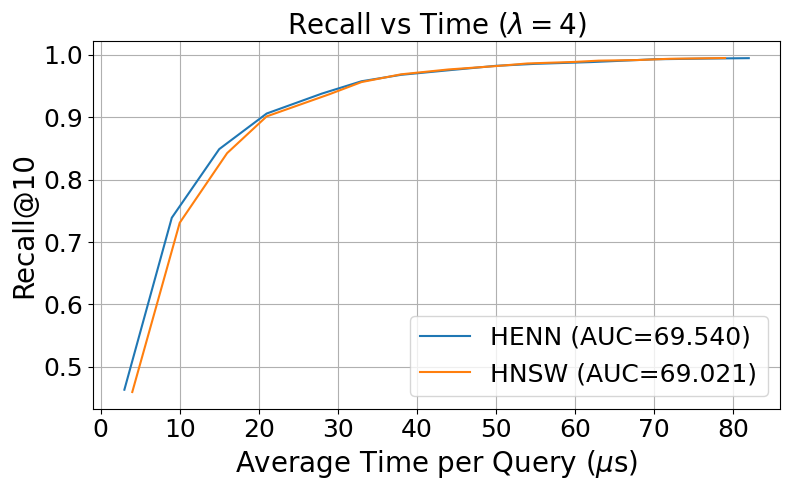

In [ ]:
lam = 4  # 256, 4, 32

henn = pd.read_csv(f"../../reports/time_recall_henn_lambda={lam}.csv")
hnsw = pd.read_csv(f"../../reports/time_recall_hnsw_lambda={lam}.csv")

henn = henn.groupby("ef").agg({"Time": "max", "Recall": "mean"}).reset_index()
hnsw = hnsw.groupby("ef").agg({"Time": "max", "Recall": "mean"}).reset_index()

henn = henn.sort_values(by="Time")
hnsw = hnsw.sort_values(by="Time")

# Filter times to lie in the same interval for both henn and hnsw
min_time = max(henn["Time"].min(), hnsw["Time"].min())
max_time = min(henn["Time"].max(), hnsw["Time"].max())

# Filter the dataframes to only include times within the common range
# henn = henn[(henn["Time"] >= min_time) & (henn["Time"] <= max_time)]
# hnsw = hnsw[(hnsw["Time"] >= min_time) & (hnsw["Time"] <= max_time)]


print(henn["Time"].min(), hnsw["Time"].min())
print(henn["Time"].max(), hnsw["Time"].max())

# Interpolate recall over a common time grid
common_time = np.linspace(min_time, max_time, num=100)

# Use numpy.interp to get recall on common grid
recall_henn_interp = np.interp(common_time, henn["Time"], henn["Recall"])
recall_hnsw_interp = np.interp(common_time, hnsw["Time"], hnsw["Recall"])

auc_henn = np.trapezoid(recall_henn_interp, common_time)
auc_hnsw = np.trapezoid(recall_hnsw_interp, common_time)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(henn["Time"], henn["Recall"], label=f"HENN (AUC={auc_henn:.3f})")
plt.plot(hnsw["Time"], hnsw["Recall"], label=f"HNSW (AUC={auc_hnsw:.3f})")

# Styling
plt.xlabel(r"Average Time per Query ($\mu$s)", fontsize=20)
plt.ylabel("Recall@10", fontsize=20)
plt.title(rf"Recall vs Time ($\lambda = {lam}$)", fontsize=20)
plt.tick_params(axis="x", labelsize=18)  # Increase font size for x-axis numbers
plt.tick_params(axis="y", labelsize=18)  # Increase font size for y-axis numbers
plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
# plt.savefig(
# f"recall_vs_time_lambda={lam}.png", bbox_inches="tight", dpi=300
# )
plt.show()